# Merge and read csv_files

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Show the combined DataFrame
df = df[df["Experiment"] == "FR_working_mem_task"]
df.head()

,Name,Experiment,Trial,Sequence,Recall
80,liv,FR_working_mem_task,1,m h z n t r u j a x e k s o c,m h z n t r
81,liv,FR_working_mem_task,2,h k o x c j v d g i u t s f n,h j g n t n t o x
82,liv,FR_working_mem_task,3,k n q j s e m i v h d z x c l,h j s e m i c l
83,liv,FR_working_mem_task,4,j e f x h m p y t b a q g o i,f x b a g o i
84,liv,FR_working_mem_task,5,c k m o s z i t a n h d u e p,c k t a n u e


# Get positions and amount of correct recall

In [2]:
def add_position_and_correct_guesses(df, sequence_col="Sequence", recall_col="Recall"):
    # Helper function to get correct positions as a string
    def get_positions(row):
        s = row[sequence_col].split()
        r = row[recall_col].split()
        positions = []
        for i, word in enumerate(s):
            if word in r:
                positions.append(str(i))
        return " ".join(positions)

    # Add column with correct positions
    df["Position correct recall"] = df.apply(get_positions, axis=1)
    # Add column with amount of correct guesses
    df["Amount of correct guesses"] = df["Position correct recall"].apply(lambda x: len(x.split()))
    return df

df = add_position_and_correct_guesses(df)
df.head()

,Name,Experiment,Trial,Sequence,Recall,Position correct recall,Amount of correct guesses
80,liv,FR_working_mem_task,1,m h z n t r u j a x e k s o c,m h z n t r,0 1 2 3 4 5,6
81,liv,FR_working_mem_task,2,h k o x c j v d g i u t s f n,h j g n t n t o x,0 2 3 5 8 11 14,7
82,liv,FR_working_mem_task,3,k n q j s e m i v h d z x c l,h j s e m i c l,3 4 5 6 7 9 13 14,8
83,liv,FR_working_mem_task,4,j e f x h m p y t b a q g o i,f x b a g o i,2 3 9 10 12 13 14,7
84,liv,FR_working_mem_task,5,c k m o s z i t a n h d u e p,c k t a n u e,0 1 7 8 9 12 13,7


# Primacy and recency effect

In [3]:
# Total amount of FR experiments done
amount_of_experiments = df.shape[0]
print("Amount of FR experiments:", amount_of_experiments)

# Combine the lists of the correct positions to 1 big list
all_correct_positions= []
for row in df["Position correct recall"]:
    row = row.split()
    all_correct_positions.extend(row)
all_correct_positions = [int(x) for x in all_correct_positions]

# Average correct
average_correct = len(all_correct_positions) / amount_of_experiments
print("Average ammount of correct per experiment:", average_correct)

# Count of correct guesses for each position
correct_per_position= [all_correct_positions.count(position) for position in range(15)]

# Percent correct at each position out of all experiments
position_correct_percent = [corrects/amount_of_experiments*100 for corrects in correct_per_position] 

Amount of FR experiments: 80
Average ammount of correct per experiment: 7.0875


Text(0.5, 1.0, 'Free Recall Working Memory Task')

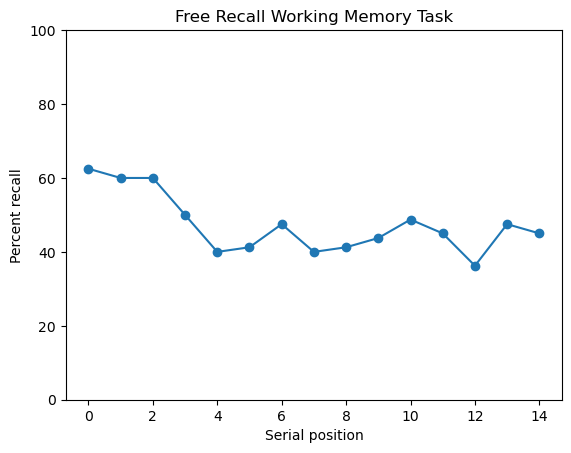

In [4]:
plt.plot(position_correct_percent, marker="o")
plt.xlabel("Serial position")
plt.ylim(0,100)
plt.ylabel("Percent recall")
plt.title("Free Recall Working Memory Task")

# Confidence Interval for amount of correct guesses

In [5]:
num_correct_in_experiments=df["Amount of correct guesses"].to_numpy()
num_correct_in_experiments

array([ 6,  7,  8,  7,  7,  6,  7,  4,  5,  9, 10,  8,  9,  9, 10,  8,  9,
        9,  8, 10,  8,  9,  3,  6,  5,  6,  5,  5,  7,  6,  5,  7,  8,  7,
       10,  7,  4,  7,  9,  6,  8,  7,  9, 10, 10,  9,  8,  7, 12,  7, 10,
        8,  6, 10, 11,  7,  8,  9,  8, 10,  7,  6,  6,  5,  3,  7,  6,  4,
        6,  6,  5,  6,  4,  8,  6,  3,  5,  4,  5,  5], dtype=int64)

In [6]:
x=num_correct_in_experiments
stats.ttest_1samp(x,popmean= np.mean(x)).confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=6.639342611109054, high=7.535657388890947)

The mean of correct guessses for the working memory free recall \n
$[6.64:7.54]$